## Customer Segmentation Project
You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

Problem Statement
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

Dataset
The dataset is taken from [Kaggle](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)

Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data Collection & Analysis

In [2]:
# loading the data from csv file to a Pandas DataFrame
customer_data = pd.read_csv('Mall_Customers.csv')

In [19]:
# first 5 rows in the dataframe
customer_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
# finding the number of rows and columns
customer_data.shape

(200, 5)

In [5]:
# getting some informations about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Choosing the Annual Income Column & Spending Score column

In [8]:
# X = customer_data.iloc[:,[3,4]].values
X = customer_data.drop('CustomerID',axis=1)

In [9]:
X = pd.get_dummies(X,drop_first=True)

### Choosing the number of clusters

### What is **WCSS**?

**WCSS = Within-Cluster Sum of Squares**

It measures **how tightly the data points are clustered around their cluster centroid**.

### Mathematical idea :

For each cluster:

* Take the distance between every point and its cluster centroid
* Square those distances
* Add them up

$$
WCSS = \sum_{i=1}^{k} \sum_{x \in C_i} \left \| x - \mu_i \right \|^2
$$

---

### What does WCSS tell us?

*  **Low WCSS** → points are **close to their centroid** → good clusters
*  **High WCSS** → points are **spread out** → poor clustering

So WCSS = measure of **cluster compactness**.

---

### Why do we use WCSS in **K-Means**?

Because **K-Means tries to minimize WCSS**.

### Core goal of K-Means:

Assign points to clusters such that **WCSS is minimum**.

This is exactly what the K-Means algorithm optimizes internally.

---

### Problem: How to choose the best value of **K**?

As **K increases**:

* Clusters become smaller
* WCSS **always decreases**

So we can’t just pick the highest K.

---

### Solution: **Elbow Method**

We plot:

* X-axis → number of clusters (K)
* Y-axis → WCSS

### What we look for:

* A point where the reduction in WCSS **slows down sharply**
* This point looks like an **elbow**

That K is considered optimal.

---

### Intuition using real life example

Imagine grouping houses in a city:

* **K = 1** → one centroid → very spread → high WCSS
* **K = 10** → tightly grouped → low WCSS
* After some K, adding more clusters doesn’t improve compactness much

That slowdown point = best K.

In [10]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

<Axes: >

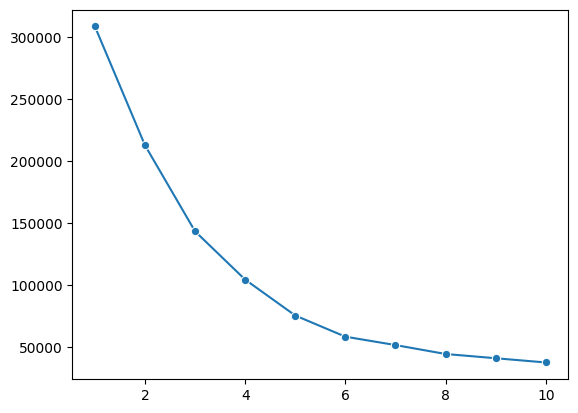

In [ ]:
# plot an elbow graph
sns.lineplot(x=range(1, 11), y=wcss, marker='o')

Optimum Number of Clusters = 5

Training the k-Means Clustering Model

In [12]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

Y = kmeans.fit_predict(X)

print(Y)

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 3 1 2 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 2 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [15]:
df_plot = X.copy()
df_plot['Cluster'] = Y

5 Clusters -  0, 1, 2, 3, 4

Visualizing all the Clusters

In [17]:
df_plot.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male',
       'Cluster'],
      dtype='object')

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

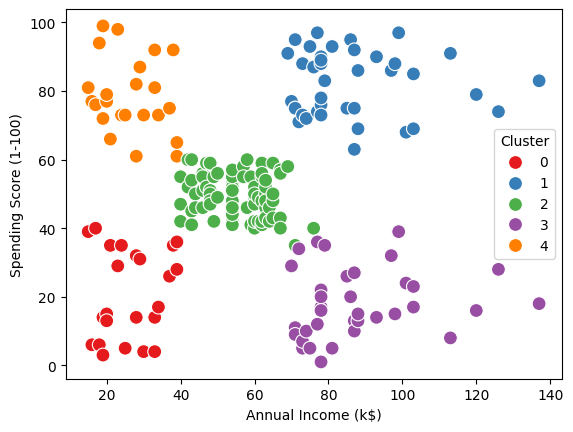

In [20]:
# plotting all the clusters and their Centroids

sns.scatterplot(
    data=df_plot,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='Set1',
    s=100
)
